In [1]:
import rep

In [2]:
import numpy
import matplotlib

In [3]:
%matplotlib inline

In [4]:
import pandas

In [5]:
df = pandas.read_csv("data/public/public_train.csv")

In [7]:
df.describe()

,switching_parameter,rational_expectation_cost,risk_free_return,weight_past_profits,delta,alpha,bias_1,trend_1,bias_2,trend_2,p-value
count,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,418673.000000,4.186730e+05
mean,6.240038,2.854051,1.054760,0.497788,0.521785,54.933996,1.397249,-0.218374,1.267590,0.174591,8.524464e-05
std,2.193694,1.603728,0.028761,0.290867,0.331718,27.501018,0.436988,0.705993,0.521963,0.443149,1.587429e-03
min,2.500000,0.000000,1.010000,0.000000,0.000000,1.000000,-1.100000,-2.000000,-0.900000,-2.000000,1.015286e-68
25%,4.300000,2.000000,1.030000,0.250000,0.210000,32.000000,1.100000,-0.600000,0.900000,-0.100000,1.607044e-11
50%,6.200000,3.000000,1.050000,0.500000,0.520000,56.000000,1.500000,-0.200000,1.300000,0.100000,1.216523e-09
75%,8.100000,4.000000,1.080000,0.750000,0.840000,79.000000,1.700000,0.200000,1.700000,0.400000,1.045499e-07
max,10.000000,5.000000,1.100000,1.000000,1.000000,100.000000,2.000000,2.000000,2.000000,2.000000,3.274180e-01


In [9]:
df.shape

(418673, 11)

In [10]:
features = df.drop(['p-value'], axis=1)

In [11]:
features.shape

(418673, 10)

In [12]:
df.shape

(418673, 11)

In [26]:
y_float = df['p-value'].values.astype('float32')

In [27]:
y_float

array([  1.04549898e-07,   4.33655022e-12,   1.13250197e-12, ...,
         8.38231134e-12,   2.22520201e-12,   1.20410997e-08], dtype=float32)

In [28]:
y_label = y_float > 0.001

In [29]:
y_label

array([False, False, False, ..., False, False, False], dtype=bool)

In [30]:
from matplotlib import pylab

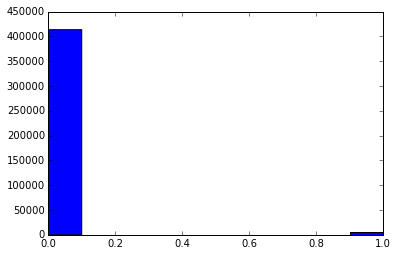

In [31]:
pylab.hist(y_label);

In [33]:
len(y_label[y_label>0.5]), len(y_label[y_label<=0.5]), 

(5114, 413559)

In [39]:
weights = 100*(y_label> 0.5) + 1

(array([ 413559.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    5114.]),
 array([   1.,   11.,   21.,   31.,   41.,   51.,   61.,   71.,   81.,
          91.,  101.]),
 <a list of 10 Patch objects>)

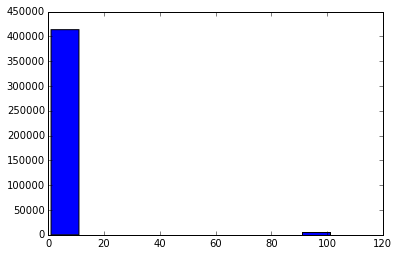

In [40]:
pylab.hist(weights)

(array([ 413559.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  516514.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

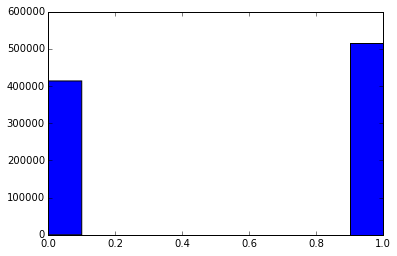

In [41]:
pylab.hist(y_label, weights=weights)

In [42]:
from sklearn.cross_validation import train_test_split


In [54]:
x_train, x_test, y_train, y_test = train_test_split(features, y_label, test_size=0.5)

In [55]:
y_label

array([False, False, False, ..., False, False, False], dtype=bool)

In [56]:
import xgboost

In [57]:
weights_train = 100* (y_train>0.001) + 1

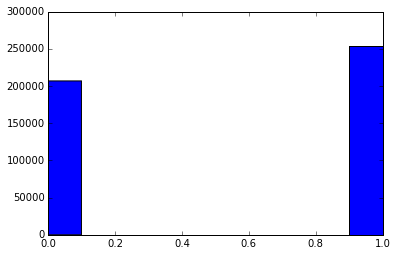

In [58]:
pylab.hist(y_train, weights=weights_train);

In [60]:
xgm = xgboost.XGBClassifier(max_depth=5)

In [63]:
x_train.describe()

,switching_parameter,rational_expectation_cost,risk_free_return,weight_past_profits,delta,alpha,bias_1,trend_1,bias_2,trend_2
count,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000,209336.000000
mean,6.241131,2.856723,1.054682,0.498061,0.521765,54.888452,1.396727,-0.215362,1.268372,0.173031
std,2.193524,1.602417,0.028729,0.290765,0.331533,27.501843,0.437212,0.704949,0.521471,0.443029
min,2.500000,0.000000,1.010000,0.000000,0.000000,1.000000,-1.100000,-2.000000,-0.600000,-2.000000
25%,4.300000,2.000000,1.030000,0.250000,0.210000,32.000000,1.100000,-0.600000,0.900000,-0.100000
50%,6.200000,3.000000,1.050000,0.500000,0.520000,56.000000,1.400000,-0.200000,1.300000,0.100000
75%,8.100000,4.000000,1.080000,0.750000,0.840000,79.000000,1.700000,0.200000,1.700000,0.400000
max,10.000000,5.000000,1.100000,1.000000,1.000000,100.000000,2.000000,2.000000,2.000000,2.000000


In [64]:
x_train.values

array([[ 5.3 ,  2.  ,  1.04, ..., -0.9 ,  0.4 ,  0.7 ],
       [ 6.3 ,  3.  ,  1.09, ..., -1.9 ,  1.8 ,  1.9 ],
       [ 5.1 ,  5.  ,  1.1 , ...,  1.1 ,  1.  ,  0.2 ],
       ..., 
       [ 5.7 ,  2.  ,  1.09, ..., -0.6 ,  0.2 ,  0.8 ],
       [ 8.9 ,  1.  ,  1.09, ..., -0.8 ,  0.5 ,  0.5 ],
       [ 2.5 ,  2.  ,  1.02, ...,  0.6 ,  0.6 ,  0.4 ]])

In [76]:
xgm.fit(x_train.values, y_train, sample_weight=weights_train)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1)

In [77]:
from sklearn.metrics import f1_score

def score(y_test, y_pred, p_threshold=0.001):
    return f1_score(y_test > p_threshold, y_pred > p_threshold)

In [78]:
y_pred = xgm.predict_proba(x_test.values)[:, 1]

In [79]:
score(y_pred, y_test)

0.051743196008723444

In [70]:
y_pred_train = xgm.predict_proba(x_train.values)[:, 1]

In [71]:
score(y_pred_train, y_train)

0.10073557412863528

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=200)

In [73]:
clf.fit(x_train.values, y_train, )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=200,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_pred = clf.predict_proba(x_test.values)[:, 1]

In [75]:
score(y_pred, y_test)

0.024535593124371861

In [111]:
from sklearn.metrics import recall_score, precision_score

def scan_thresholds(y_test, y_pred):
    thresholds = numpy.arange(0.0, 1.0, 0.01)
    recall_scores = [recall_score(y_test, y_pred > threshold) for threshold in thresholds]
    precision_scores = [precision_score(y_test, y_pred > threshold) for threshold in thresholds]
    f1_scores = [score(y_test, y_pred > threshold) for threshold in thresholds]
    

    pylab.plot(thresholds, recall_scores)
    pylab.plot(thresholds, precision_scores)
    pylab.plot(thresholds, f1_scores);
    pylab.legend(["recall", "precision", "f1"])
    i = numpy.argmax(f1_scores)
    print thresholds[i]
    

0.96


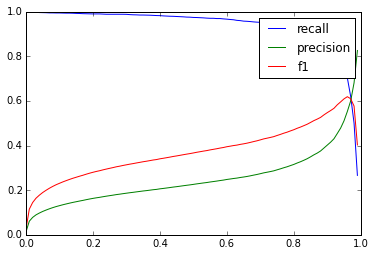

In [113]:
scan_thresholds(y_test, y_pred)

In [114]:
score(y_test, y_pred > 0.96)

0.61879762912785774